# Bibliotecas necessárias para o desenvolvimento.

In [1]:
# libs para o desenvolvimento
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Carregando as bases de dados, nas variáveis Fake e True.

In [2]:
fake = pd.read_csv("C:/temp/modelo_preditivo_TCC2/Fake.csv")
true = pd.read_csv("C:/temp/modelo_preditivo_TCC2/True.csv")

In [3]:
# Analisando o tamanho da base Fake.
fake.shape

(23481, 4)

In [4]:
# Analisando o tamanho da base True
true.shape

(21417, 4)

In [5]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


# Visualizando o dataframe com suas respectivas linhas e colunas

In [7]:
true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [8]:
fake.head(20)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


# Adicionando uma coluna "Target" para Fake e True

In [9]:
# Adicionando a variavel alvo ou a coluna Target para categorizar/mostrar para os modelos quais informações são T ou F
fake['target'] = 'fake'
true['target'] = 'true'

In [10]:
# Analisando novamente o dataframe com a nova coluna Target
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [11]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


# Fazendo a concatenação das duas tabelas Fake e True

In [12]:
# Concatenando as duas tabelas na variavel data e analise o seu shape
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [13]:
# Colocando os indices de forma aleatoria utilizando o shuffle e resetando os indicies que estavam na tabela anterior.
# Se não embaralhar, seria levado a um desvio padrão, podendo pegar somente true ou somente fake, enviezando o modelo.
# desse modo gera um conjunto mais diversificado.
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [14]:
# Conferindo o resultado
data.head(10)

,title,text,subject,date,target
0,"Obama knocks Trump, voices optimism",WASHINGTON - President Barack Obama took aim o...,politicsNews,"January 13, 2016",true
1,House Republicans ready legal fight against Ob...,WASHINGTON (Reuters) - Republicans in the Hous...,politicsNews,"February 24, 2016",true
2,Short Film Envisions Effect Global Warming Wi...,The world was stunned when Donald Trump pulled...,News,"June 13, 2017",fake
3,Niger defense minister asks U.S. to deploy arm...,(This Nov. 1 story refiles to fix typo in aut...,worldnews,"November 1, 2017",true
4,RUSSIA Tells Sore Loser Obama To Produce Some ...,The Russians may not have hacked our elections...,politics,"Dec 16, 2016",fake
5,THIS INTERNATIONAL COMPANY Is Luring Refugees ...,Are you tired of supporting companies who are ...,politics,"Jan 14, 2016",fake
6,STUNNING: Podesta Brothers and Manafort Connec...,Tucker Carlson had bombshell announcements ton...,politics,"Oct 24, 2017",fake
7,Trump says union head who accused him of lying...,NEW YORK (Reuters) - Donald Trump clashed on W...,politicsNews,"December 8, 2016",true
8,WATCH: President Obama HAMMERS Trump For Clai...,Donald Trump thinks African-Americans are wors...,News,"September 23, 2016",fake
9,Dying GOP Senator Spent Final Days Apologizin...,Former Utah Senator Bob Bennett lay in a hospi...,News,"May 18, 2016",fake


# Removendo a coluna Data, assim o modelo se torna mais assertivo devido a padronização das informações.

In [15]:
# Removendo a coluna data e analisando novamente o dataframe
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,"Obama knocks Trump, voices optimism",WASHINGTON - President Barack Obama took aim o...,politicsNews,true
1,House Republicans ready legal fight against Ob...,WASHINGTON (Reuters) - Republicans in the Hous...,politicsNews,true
2,Short Film Envisions Effect Global Warming Wi...,The world was stunned when Donald Trump pulled...,News,fake
3,Niger defense minister asks U.S. to deploy arm...,(This Nov. 1 story refiles to fix typo in aut...,worldnews,true
4,RUSSIA Tells Sore Loser Obama To Produce Some ...,The Russians may not have hacked our elections...,politics,fake


# Removendo a coluna Título, fazendo a limpeza e tratamento, para assim o modelo se tornar mais assertivo.

In [16]:
# Removendo a coluna titulo e analisando novamente o dataframe
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,WASHINGTON - President Barack Obama took aim o...,politicsNews,true
1,WASHINGTON (Reuters) - Republicans in the Hous...,politicsNews,true
2,The world was stunned when Donald Trump pulled...,News,fake
3,(This Nov. 1 story refiles to fix typo in aut...,worldnews,true
4,The Russians may not have hacked our elections...,politics,fake


# Transformando todas as palavras em minúsculas, continuando o processo de tratamento de limpeza dos dados para assertividade dos modelos. 

In [17]:
# Convertendo as informações da coluna Texto para minúsculos, para não haver diferença nas informações 
# E analisando novamente o dataframe

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington - president barack obama took aim o...,politicsNews,true
1,washington (reuters) - republicans in the hous...,politicsNews,true
2,the world was stunned when donald trump pulled...,News,fake
3,(this nov. 1 story refiles to fix typo in aut...,worldnews,true
4,the russians may not have hacked our elections...,politics,fake


# Removendo as pontuações, continuando o processo de tratamento e limpeza do dados para assim o modelo se torna mais assertivo.

In [18]:
# Removendo os pontos nos textos.
# usando a função punctuation_removal recebendo como parametro o texto.
# usando a variavel clean_str recebe as informações da variavel all_list sem pontuações e separando-os por ''

import string

def removendoPontuacao(text):
    todoTexto = [char for char in text if char not in string.punctuation]
    limpandoTexto = ''.join(todoTexto)
    return limpandoTexto

data['text'] = data['text'].apply(removendoPontuacao)

In [19]:
# Analisando as mudanças que foram feitas no dataframe, após a limpeza e tratamento dos dados.
data.head()

,text,subject,target
0,washington president barack obama took aim on...,politicsNews,true
1,washington reuters republicans in the house o...,politicsNews,true
2,the world was stunned when donald trump pulled...,News,fake
3,this nov 1 story refiles to fix typo in autho...,worldnews,true
4,the russians may not have hacked our elections...,politics,fake


# Usando a biblioteca nltk para remover os stopwords. 
# São palavras que podem ser consideradas irrelevantes para o conjunto de resultados a ser exibido

In [22]:
# Removendo os stopwords que são palavras condideradas não importantes para a analise dos textos.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\C0629809\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Analisando o dataframe após a remoção do stopwords
data.head()

,text,subject,target
0,washington president barack obama took aim tue...,politicsNews,true
1,washington reuters republicans house represent...,politicsNews,true
2,world stunned donald trump pulled usa paris cl...,News,fake
3,nov 1 story refiles fix typo author name tim c...,worldnews,true
4,russians may hacked elections going stop obama...,politics,fake


# Analisando  a quantidade de assunto por tópicos

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


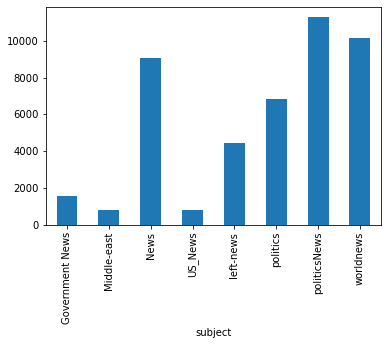

In [24]:
# Quantidade de assunto por seus respectivos topicos 
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

# Analisando a quantidade de assuntos Fake e True.
# Fake:  23481 assuntos falsos
# True:  21417 assuntos verdadeiros

target
fake    23481
true    21417
Name: text, dtype: int64


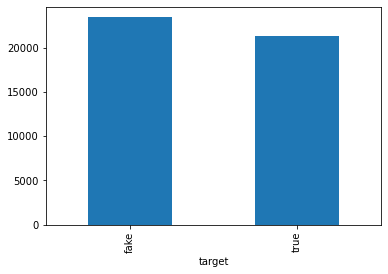

In [25]:
# Quantidade de assunto falsos e verdadeiros
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

# Utilizando a biblioteca WordCloud para criar uma nuvem de palavras.

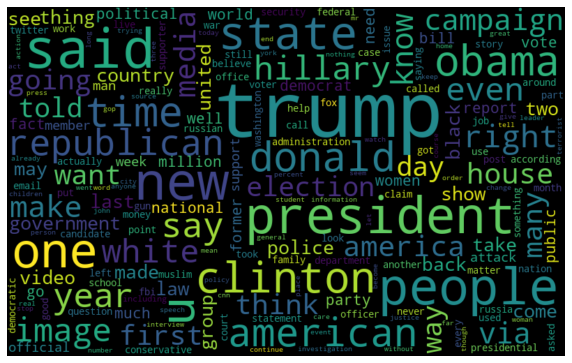

In [26]:
# Usando a biblioteca de WordCloud para criar uma nuvem de palavras do dataset fake.
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

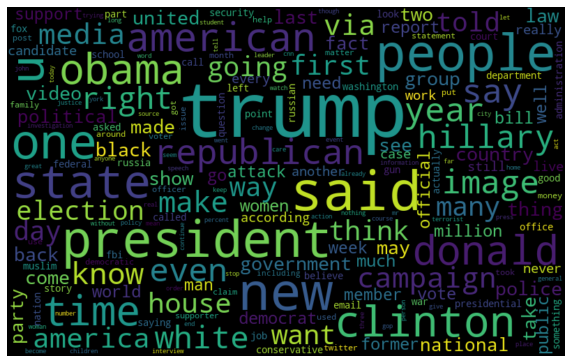

In [27]:
# Usando a biblioteca de WordCloud para criar uma nuvem de palavras do dataset true.
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Contando as palavras utilizadas com mais frequência 

In [29]:
# Utilizando a biblioteca para fazer uma contagem das palavras usadas com mais frequencia.
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

# Palavras mais utilizadas na base de dados Fake

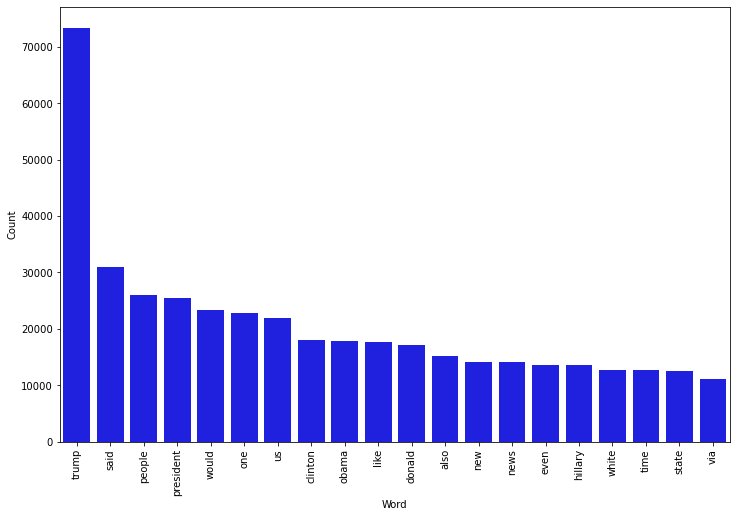

In [30]:
# Exibindo as palavras mais utilizadas da base de dados Fake
counter(data[data["target"] == "fake"], "text", 20)

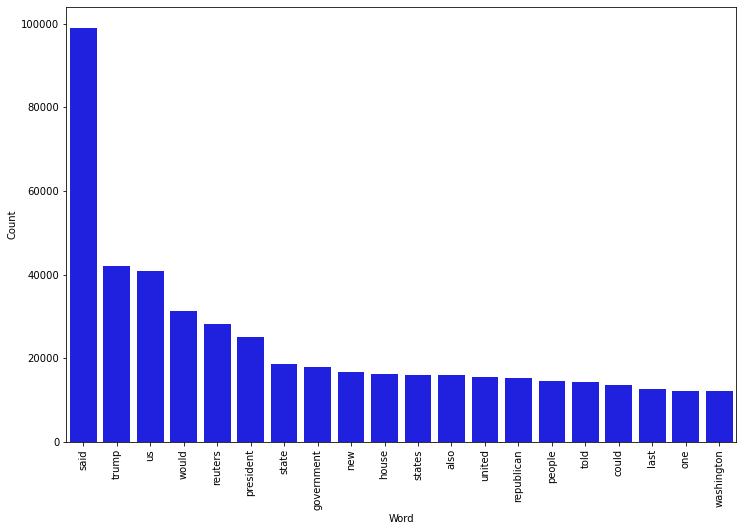

In [33]:
# Exibindo as palavras mais utilizadas da base de dados True
counter(data[data["target"] == "true"], "text", 20)

# Função para plotar a matriz de confusão 

In [27]:
# Função para fazer o plot da matrix de confusão  
from sklearn import metrics
import itertools

def plotConfusionMatrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    '''if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "red")
'''
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Dividindo a feature Text para X_traino e X_Teste, para o modelo começar a aprender

In [29]:
# Dividindo a coluna texto com 80% para treino e 20% para teste no modelo.
X_train,X_test,y_train,y_test = train_test_split(dados['text'], dados.alvo, test_size=0.2, random_state=42)

# Desenvolvendo o modelo Logistic Regression / Regressão Logística

In [29]:
# Aplicando o algoritomo Logistic Regression e o TF-IDF.
# Que é responsavel por analisar a frequência com que o termo aparece no documento ou texto.
# Quanto maior for a sua frequencia, maior a sua importancia.
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Ajustando o modelo
model = pipe.fit(X_train, y_train)

# Accuracy do Modelo
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.78%


# Aplicando a matriz de confusão para avaliar o desempenho do modelo Logistic Regression

<AxesSubplot:>

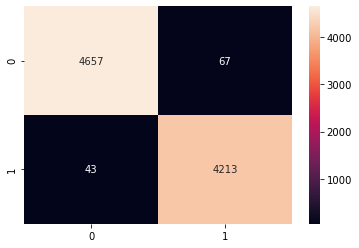

In [31]:
# Matriz aplicada ao modelo Logistic Regression
sns.heatmap(cm,annot=True, fmt="d")

# Desenvolvendo o modelo  DecisionTree ou Árvore de Decisão 

In [32]:
from sklearn.tree import DecisionTreeClassifier


pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])

model = pipe.fit(X_train, y_train)

prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.61%


# Aplicando a matriz de confusão para avaliar o desempenho do algoritmo DecisionTree

<AxesSubplot:>

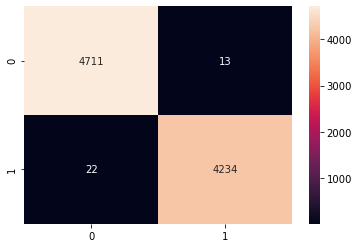

In [34]:
# Matriz aplicada ao modelo DecisionTree
sns.heatmap(cm,annot=True, fmt="d")

# Desenvolvendo o modelo  Ramdom Forest / Floresta Aleatória 

In [35]:
from sklearn.ensemble import RandomForestClassifier


pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.08%


# Aplicando a matriz de confusão para avaliar o desempenho do algoritmo Random Forest

<AxesSubplot:>

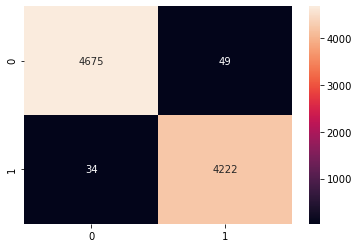

In [37]:
# Matriz aplicado ao Random Forest
sns.heatmap(cm,annot=True, fmt="d")

# Desenvolvendo o modelo  Suport Vector Machine / Máquina de vetores de suporte


In [38]:
from sklearn.svm import LinearSVC

X_train,X_test,y_train,y_test = train_test_split(dados['text'], dados.alvo, test_size=0.2, random_state=42)



pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))



accuracy: 99.52%


# Aplicando a matriz de confusão para avaliar o desempenho do algoritmo Suporte Vector Machine

<AxesSubplot:>

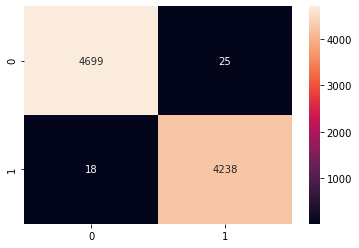

In [40]:
# Matriz aplicado ao SVM
sns.heatmap(cm,annot=True, fmt="d")

# Desenvolvendo o modelo  K-Nearest Neighbors / K-Vizinhos mais Próximos

In [41]:
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test = train_test_split(dados['text'], dados.alvo, test_size=0.2, random_state=42)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 60.84%


# Aplicando a matriz de confusão para avaliar o desempenho do algoritmo KNN

<AxesSubplot:>

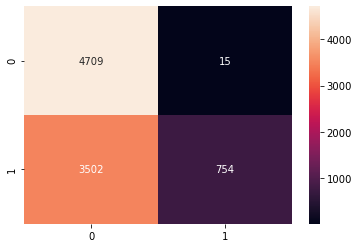

In [43]:
# matriz aplicado ao modelo KNN-KNeighbors
sns.heatmap(cm,annot=True, fmt="d")